# **SARS-CoV-2 NUCLEOTIDE SEQUENCES CLUSTERING**

In this task a system was built to cluster genome data from patients indicated COVID-19 to determine coronavirus variations. The method used is a deep autoencoder for feature extraction and dimensional reduction, K-means for data clustering, and Python programming language.

**Results and Discussions**

To test the system performance that has been built, testing is done by comparing experiments with the AutoEncoder 1 model (output feature 10), 2 (output feature 50), and 3 (output feature 100) based on MSE and Time Processing of training and validation process and sequence clustering results with the K-means algorithm. Details of the AutoEncoder model and evaluation used are presented in the Methodology section. Here are some of the results and analysis of the experiments that have been carried out:
* Comparison of AutoEncoder 1, 2 and 3 models based on MSE calculations and time processing of training and validation process. Based on the results presented in Table 1, the average MSE training and validation in the AutoEncoder models 2 and 3 are better than the AutoEncoder 1 model. This shows that the AutoEncoder 2 and 3 models converge faster than the AutoEncoder 1 model. And the AutoEncoder 2 and 3 models has a faster processing time than the AutoEncoder 1 model.
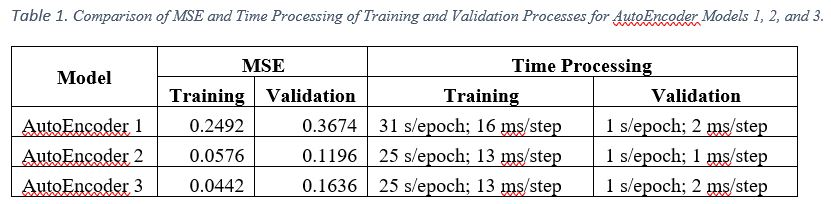
* Comparison of Elbow graph from COVID-19 sequences clustering. Based on the Elbow graph in Figure 2 and Figure 3 (Models 2 and 3) the exact number of clusters cannot be determined for cluster COVID-19 sequence data because there is no point forming the Elbow and then the SSE value is stable. This can be due to the dimension of the data from feature extraction is still too large for the K-means algorithm, so a larger dimension reduction is needed. Whereas in Figure 1 (Model 1), the Elbow graph has converged and formed the Elbow at cluster 12.
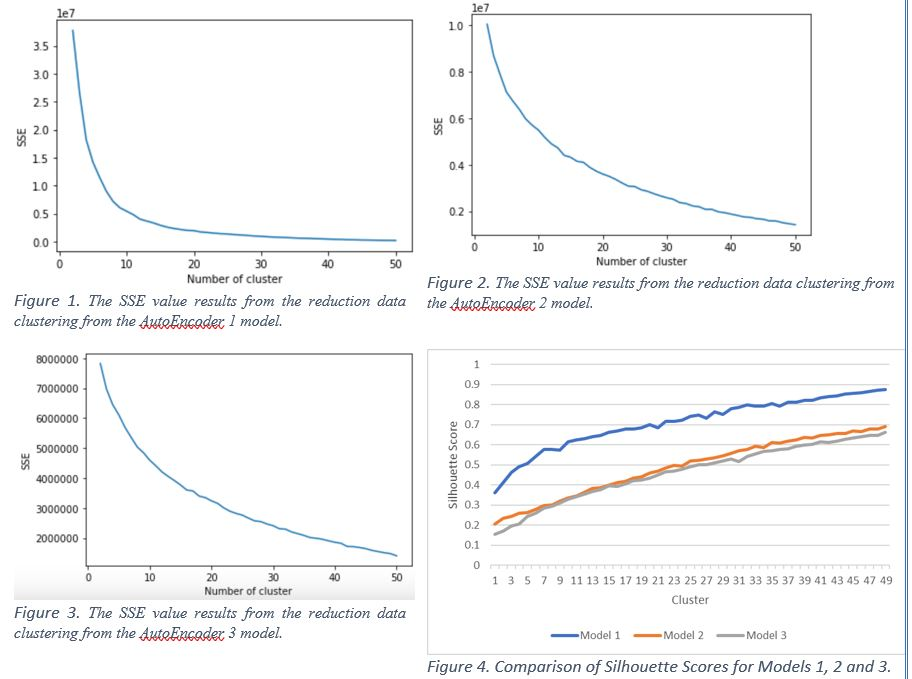
* Comparison of Silhouette scores for each cluster from COVID-19 sequences clustering. Based on Figure 4, the Silhouette score of Model 1 is higher (close to 1) than Models 2 and 3. This can be due to the smaller number of features and better feature produced by Model 1 than Model 2 and 3 so the K-means algorithm can produce better cluster from these features. Silhouette score close to 1 indicate that the cluster produced is correct and the distance of data in different clusters are far apart.
* Figure 5 and Table 2 show the distribution of the amount of data based on Geo-Location in each Cluster.
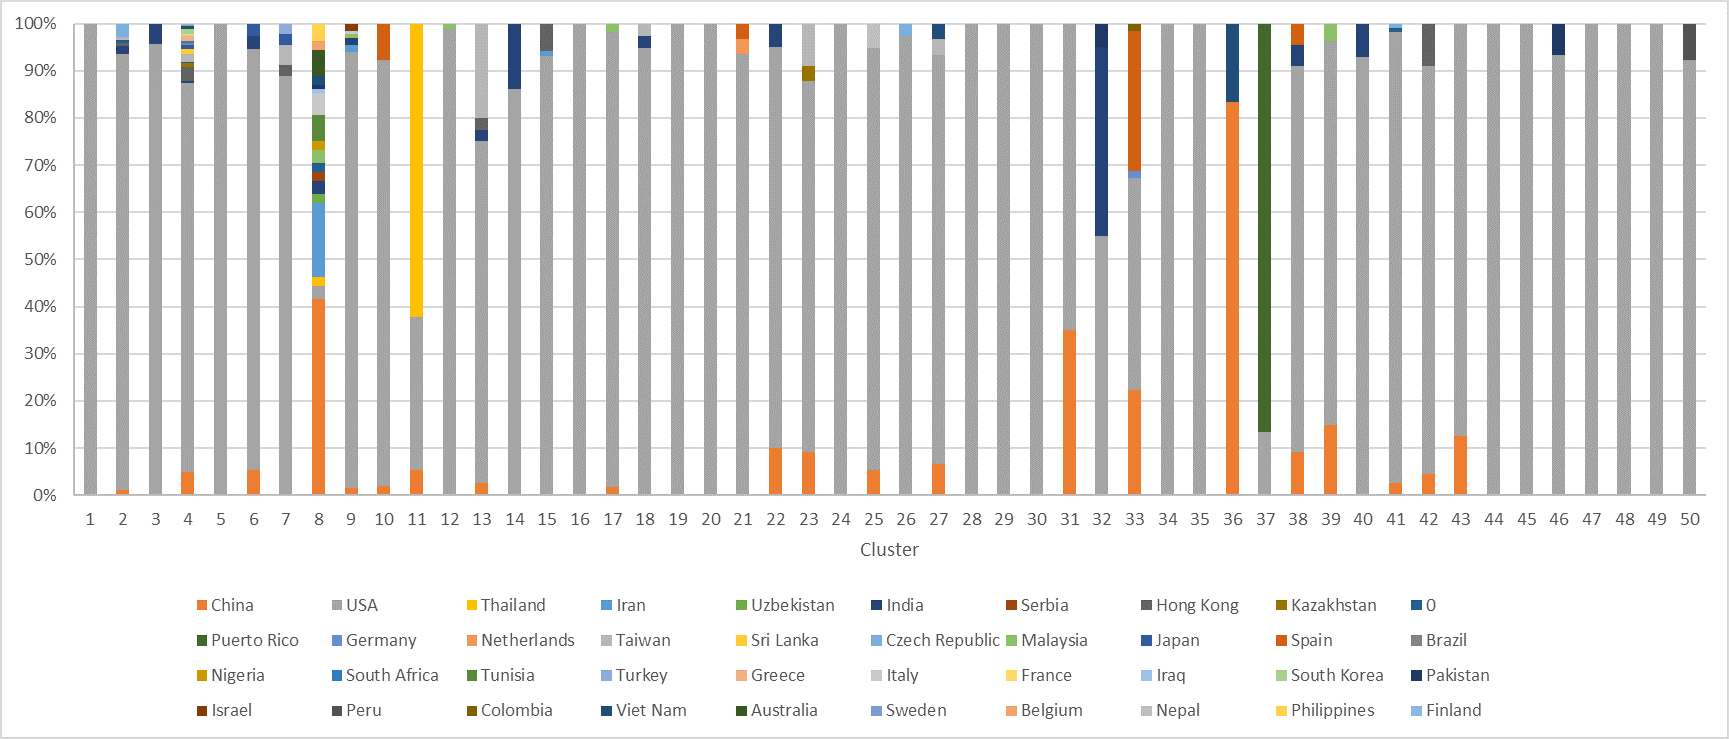
Figure 5. Distribution of the amount of data based on Geo-Location in each Cluster.

Table 2. Distribution of the amount of data based on Geo-Location in each Cluster.
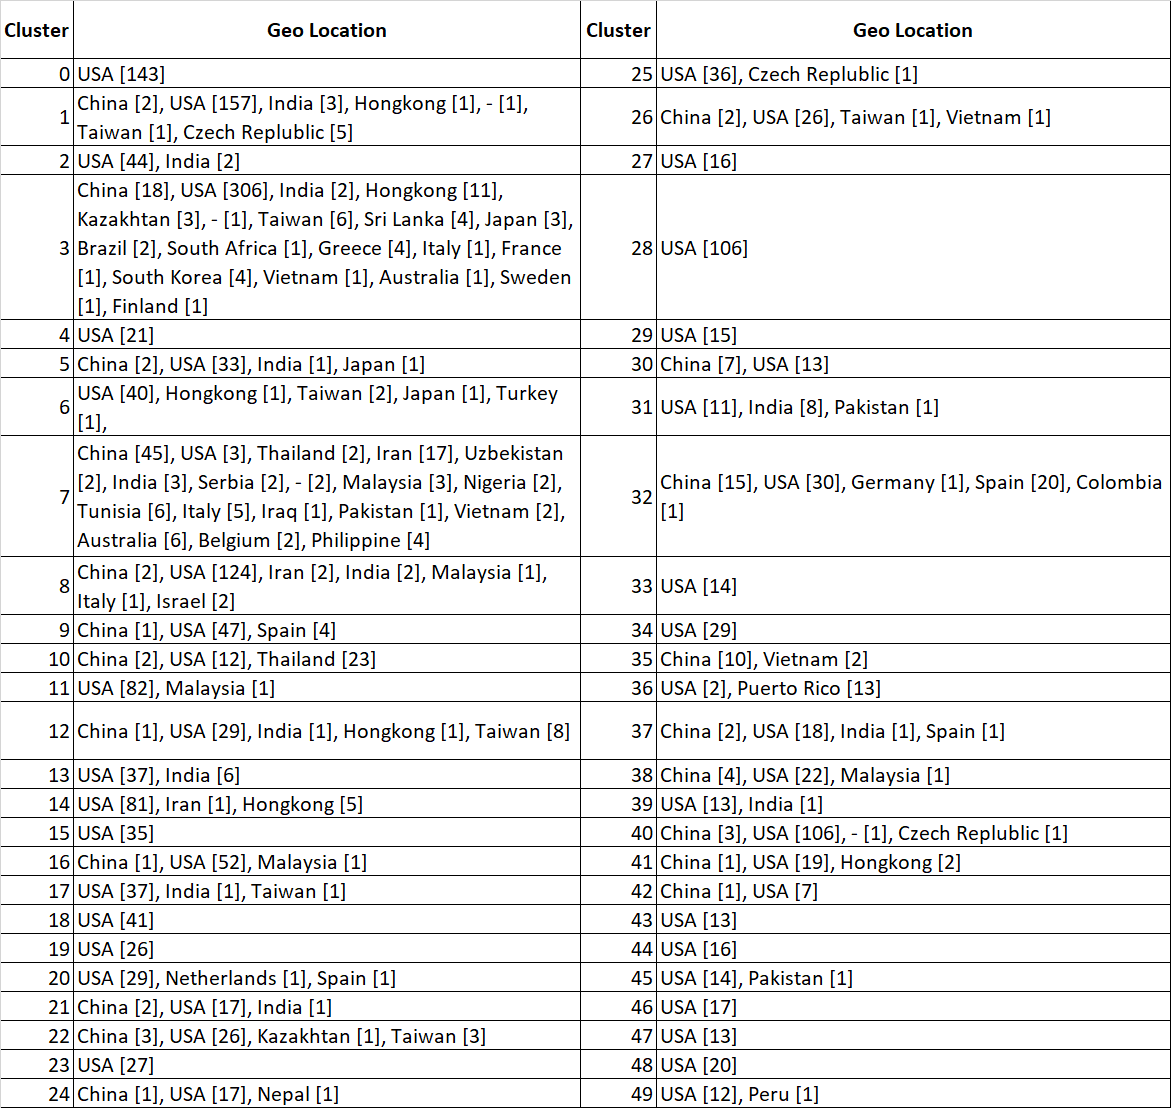

**Cons:**
The AutoEncoder training process is carried out in 100 epochs and 5 folds due to the long training time, so the AutoEncoder 1 model has not yet reached the convergence point.
The optimal number of clusters produced is 50 with a Silhouette score of 0.8764, which is already very good. However, if viewed from the distribution of the amount of data based on Geo Location in each cluster, there are several data in the same Geo Location that are still very spread to different clusters. Therefore, a re-analysis is needed to cluster the data.


**METHODOLOGY**
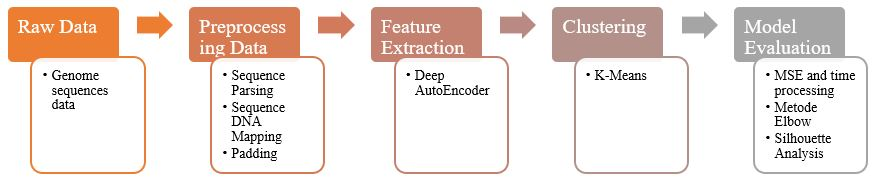
Figure 6. SARS-CoV-2 Sequence Clustering System Diagram.

Figure 6 shows a diagram process of the COVID-19 sequence clustering system. Genome sequence data of patients infected with COVID-19 were obtained from Genbank, The National Center for Biotechnology Information / NCBI (https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/) which amounted to 2434 data. The data is stored in .fasta format so that it requires a parsing process for the acquisition of sequence data only, without other information. Mapping DNA sequences is needed to convert DNA sequences into numerical sequences so that they can be processed at a later stage. The mapping technique used in this task is integer representation, where nucleotides T = 1, C = 2, A = 3, and G = 4. Then the padding process is carried out with the number 0 so that the length of the sequence becomes the same and produces a sequence length of 29,946.

To extract important features in sequence data, feature extraction is performed using the Deep Autoencoder method. The Deep AutoEncoder model that is built consists of Encoder and Decoder, where the Encoder functions to extract features from the data used and also to reduce the dimensions of the data, while the Decoder is used to reconstruct the reduced data into initial data. The model is trained with Adam's optimization algorithm and the Mean Square Error (MSE) loss function, and k-fold Cross Validation, for 100 epochs. To cluster DNA sequence data, the clustering algorithm used is the K-means algorithm, where the evaluation is measured using the Elbow and Silhouette analysis methods.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

Parsing data sekuens genome from file text from Genbank (Fasta files are converted to text files):
Note: To speed up computing and reuse parsed files, the file is saved again in a txt file, and uploaded to the Kaggle database.

In [ ]:
ii=1
with open('/kaggle/input/coronavirusgenometxt/Complete sequences.txt','r') as readfile:
    with open('hasilSekuensComplete.txt','w') as writefile:
        for line in readfile:
            if (line[0]!='>'):
                writefile.write(line[0:len(line)-1])
            else:
                writefile.write('\n')
                ii=ii+1

Create input matrix and calculate the maximum dimension of sequence data:
Note: sequences whose length is less than the maximum dimensions, padding will be carried out with a value of 0.

In [ ]:
baris=0
kolom=0
with open('/kaggle/input/coronavirusgenometxt/hasilSekuensComplete.txt','r') as readfile:
    for line in readfile:
        baris=baris+1
        if (len(line)>kolom):
            kolom=len(line)
print('Input matrix dimension= ',baris,' x ',kolom)
InputData=np.zeros((baris, kolom))

np.save('InputData.npy', InputData)

DNA sequens mapping using integer representation.

In [ ]:

InputData = np.load('InputData.npy')
with open('/kaggle/input/coronavirusgenometxt/hasilSekuensComplete.txt','r') as readfile:
    ii=0;
    for line in readfile:
        for jj in range (0,len(line)-1):
            if line[jj]=='T':
                InputData[ii,jj]=1
            elif line[jj]=='C':
                InputData[ii,jj]=2
            elif line[jj]=='A':
                InputData[ii,jj]=3
            elif line[jj]=='G':
                InputData[ii,jj]=4
            else:
                InputData[ii,jj]=0
        ii=ii+1
print('Mapping result:')
print(InputData)
np.save('InputDataInteger.npy', InputData)


**Deep AutoEncoder for Feature Extraction**

In [ ]:
import keras
from matplotlib import pyplot as plt
import numpy as np
#import gzip
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow.keras.utils import plot_model
#from keras.optimizers import RMSprop

Load data:

In [ ]:
InputData = np.load('/kaggle/input/coronavirusgenometxt/InputDataInteger.npy')

Create Model AutoEncoder (choose one model):
* Model AutoEncoder 1 (500, 250, 100, 50, 10)
* Model AutoEncoder 2 (500, 250, 100, 50)
* Model AutoEncoder 3 (500, 250, 100)

In [ ]:
# Model AutoEncoder 1 (500, 250, 100, 50, 10)
InputDim = InputData.shape[1]
# Encoder
input_encoder = Input(shape=(InputDim,))
encoded1 = Dense(500, activation='relu')(input_encoder)
encoded2 = Dense(250, activation='relu')(encoded1)
encoded3 = Dense(100, activation='relu')(encoded2)
encoded4 = Dense(50, activation='relu')(encoded3)
output_encoder = Dense(10, activation='relu')(encoded4)
encoder = Model(input_encoder, output_encoder, name='encoder')
encoder.summary()

# Decoder
input_decoder = Input(shape=(10,))
decoded1 = Dense(50, activation='relu')(input_decoder)
decoded2 = Dense(100, activation='relu')(decoded1)
decoded3 = Dense(250, activation='relu')(decoded2)
decoded4 = Dense(500, activation='relu')(decoded3)
output_decoder = Dense(InputDim, activation='relu')(decoded4)
decoder = Model(input_decoder, output_decoder, name='decoder')
decoder.summary()

# Autoencoder
autoencoder = Model(input_encoder,
                    decoder(encoder(input_encoder)),
                    name='autoencoder')
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

In [ ]:
# Model AutoEncoder 2 (500, 250, 100, 50)
InputDim = InputData.shape[1]
# Encoder
input_encoder = Input(shape=(InputDim,))
encoded1 = Dense(500, activation='relu')(input_encoder)
encoded2 = Dense(250, activation='relu')(encoded1)
encoded3 = Dense(100, activation='relu')(encoded2)
output_encoder = Dense(50, activation='relu')(encoded3)
encoder = Model(input_encoder, output_encoder, name='encoder')
encoder.summary()

# Decoder
input_decoder = Input(shape=(50,))
decoded1 = Dense(100, activation='relu')(input_decoder)
decoded2 = Dense(250, activation='relu')(decoded1)
decoded3 = Dense(500, activation='relu')(decoded2)
output_decoder = Dense(InputDim, activation='relu')(decoded3)
decoder = Model(input_decoder, output_decoder, name='decoder')
decoder.summary()

# Autoencoder
autoencoder = Model(input_encoder,
                    decoder(encoder(input_encoder)),
                    name='autoencoder')
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

In [ ]:
# Model AutoEncoder 3 (500, 250, 100)
InputDim = InputData.shape[1]
# Encoder
input_encoder = Input(shape=(InputDim,))
encoded1 = Dense(500, activation='relu')(input_encoder)
encoded2 = Dense(250, activation='relu')(encoded1)
output_encoder = Dense(100, activation='relu')(encoded2)
encoder = Model(input_encoder, output_encoder, name='encoder')
encoder.summary()

# Decoder
input_decoder = Input(shape=(100,))
decoded1 = Dense(250, activation='relu')(input_decoder)
decoded2 = Dense(500, activation='relu')(decoded1)
output_decoder = Dense(InputDim, activation='relu')(decoded2)
decoder = Model(input_decoder, output_decoder, name='decoder')
decoder.summary()

# Autoencoder
autoencoder = Model(input_encoder,
                    decoder(encoder(input_encoder)),
                    name='autoencoder')
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

Train and evaluation model using k-fold cross validation:

In [ ]:
from sklearn.model_selection import KFold
from numpy import savetxt
 
n_split=5
ii=1
kf=KFold(n_split)
#autoencoder.load_weights('ae_weights.npy')

for train_index, val_index in kf.split(InputData):
    x_train,x_test=InputData[train_index],InputData[val_index]
    y_train,y_test=InputData[train_index],InputData[val_index]
    autoencoder.fit(x_train, y_train,epochs=10)
    evalModel =  autoencoder.evaluate(x_test,y_test)
    print('Model evaluation ',evalModel)
autoencoder.save_weights('ae_weights.npy')

Dimension reduction using encoder model:

In [ ]:
autoencoder.load_weights('ae_weights.npy')
sekuens_reduced = encoder.predict(InputData)
print('size before reduction:', InputData.shape)
print('size after reduction :', sekuens_reduced.shape)
print(sekuens_reduced)
np.save('sekuens_reduced.npy',sekuens_reduced)

**Clustering data using K-means**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sse = {}
label_sekuens={}
silAvg=-1
nClustOpt=2
for nCluster in range(2, 51):
    # Train K-means
    kmeans = KMeans(n_clusters=nCluster, max_iter=100).fit(sekuens_reduced)
    cluster_labels = kmeans.fit_predict(sekuens_reduced)
    print("Number of iteration: ", kmeans.n_iter_)
    #print(cluster_labels)
    
    # Evaluation using Elbow Method:
    sse[nCluster] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    # Evaluation using Silhouette Analysis
    silhouette_avg = silhouette_score(sekuens_reduced, cluster_labels)
    print("For n_clusters =", nCluster,
          "The average silhouette_score is :", silhouette_avg)
    if (silhouette_avg>=silAvg):
        nClustOpt=nCluster

print("Number of cluster optimum =", nClustOpt)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Save the cluster label result from k-means algorithm:

In [ ]:
kmeans = KMeans(n_clusters=nClustOpt, max_iter=100).fit(sekuens_reduced)
cluster_labels = kmeans.fit_predict(sekuens_reduced)

import numpy as np
np.savetxt('ClusterLabel.csv', cluster_labels, delimiter=',')